In [1]:
#Normalize Data/Graph Data

#Import
#type (pip3 install "module") in terminal (ctrl+``) to install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')

In [2]:
#Data Set (California Housing Prices from Kaggle)
df = pd.read_csv("/Users/chrislu/Downloads/housing.csv")
df.value_counts("ocean_proximity")


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


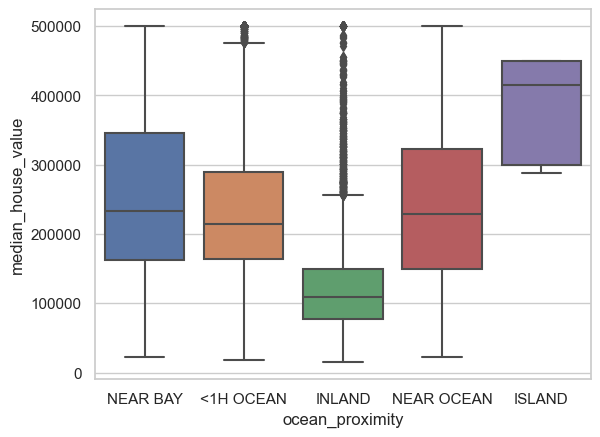

In [7]:
plot = sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
#Box Plot demonstrating the median house value based on ocean proximity
#This proves the hypothesis of real estate prices being correlated with location (the better the location, the more pricey the property)
#Location are seen as higher end when they are near to the ocean/bay
#There are a lot of outliers in inland properties (let's explore this)

In [8]:
#Summary of Outlier Statistics for Inland Properties
inland_outliers = df[df['ocean_proximity'] == 'INLAND']['median_house_value'].describe()
print(inland_outliers)

count      6551.000000
mean     124805.392001
std       70007.908494
min       14999.000000
25%       77500.000000
50%      108500.000000
75%      148950.000000
max      500001.000000
Name: median_house_value, dtype: float64


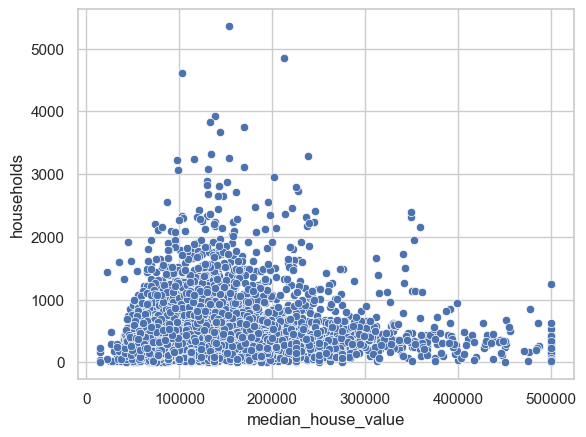

In [9]:
inland_df = df[df['ocean_proximity'] == 'INLAND']

# Graph for 'INLAND' properties using Seaborn
plot = sns.scatterplot(y='households', x='median_house_value', data=inland_df)
#May need more data to come to conclusion on this.
#Hypothesis is that while Inland properties have the lowest median price, they have many outliers due to many counties inland are very wealthy as well (ie Silicon Valley, Marin County, Palo Alto)

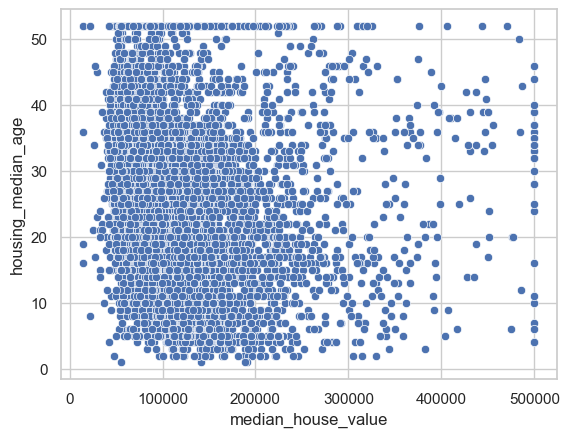

In [10]:
plot = sns.scatterplot(y='housing_median_age', x='median_house_value', data=inland_df)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

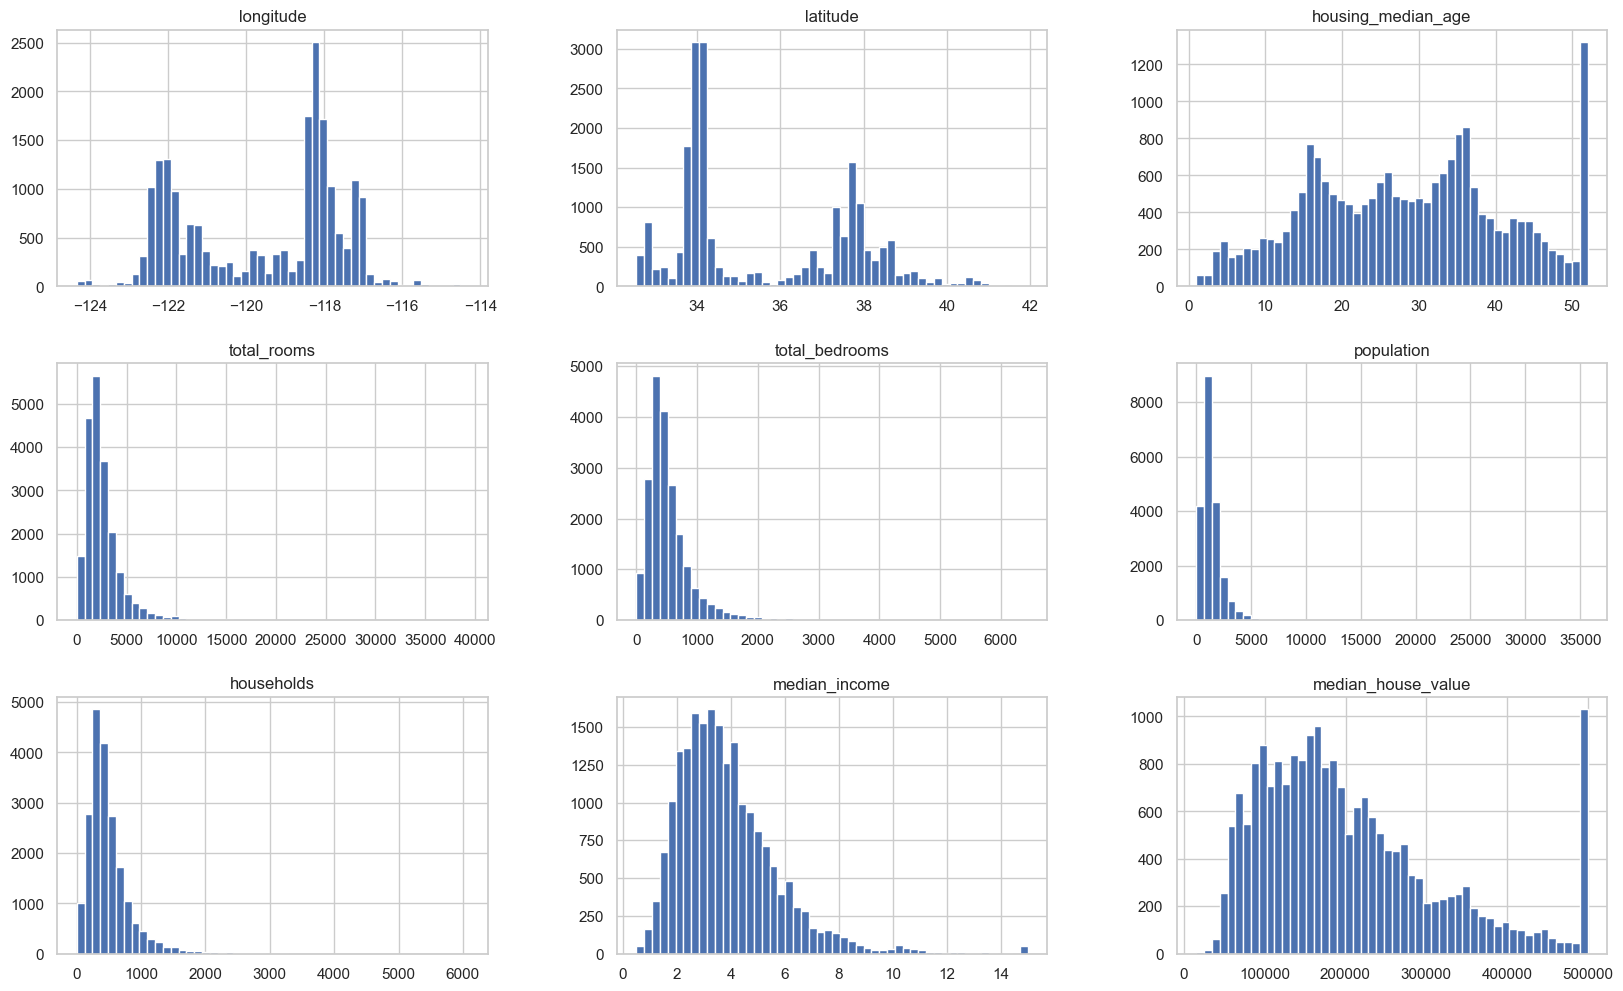

In [11]:
df.hist(bins=50, figsize=(20, 12))
# SHOWING value counts for each column/factor provided in data set
#Some insights I can determine from these histograms is 
#find most common places for households by looking at longitude/latitude
#housing median age seems to be relatively evenly distributed except for the fact that the 50+ bin is unusually high (this makes sense as older people tend to be more likely to own a house)


ModuleNotFoundError: No module named 'sklearn'